In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [8]:
X = df.iloc[:,:].values
X[:5]

array([[ 8, 14,  4,  1,  0],
       [ 6,  9,  4,  1,  0],
       [ 4, 11,  3,  1,  0],
       [ 3, 10,  5,  1,  0],
       [ 7, 15,  4,  1,  0]], dtype=int64)

In [9]:
import random
import numpy as np

class KMeans1:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        
    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

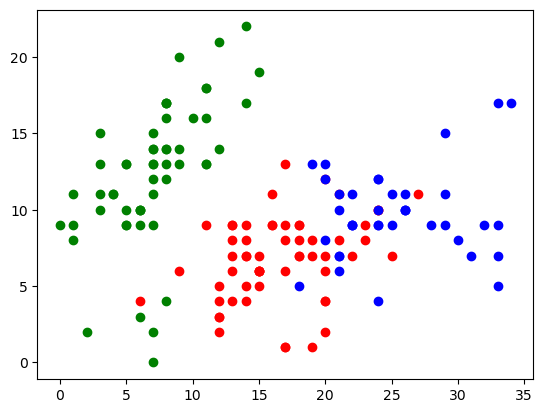

In [15]:
km = KMeans1(n_clusters=3,max_iter=1000)
y_means = km.fit_predict(X)
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
# plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


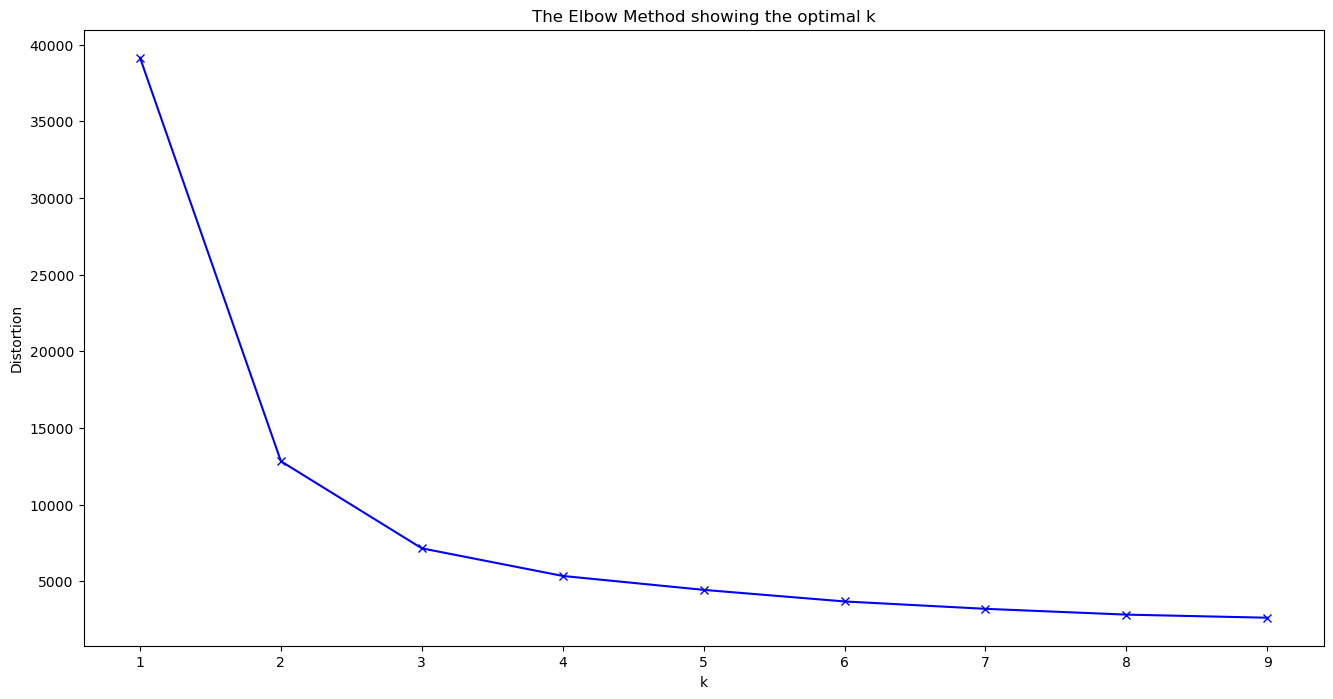

In [16]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df)
 distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


0.39473684210526316